## Part 1: Optimal Portfolio Allocation 

### a

[*********************100%***********************]  5 of 5 completed


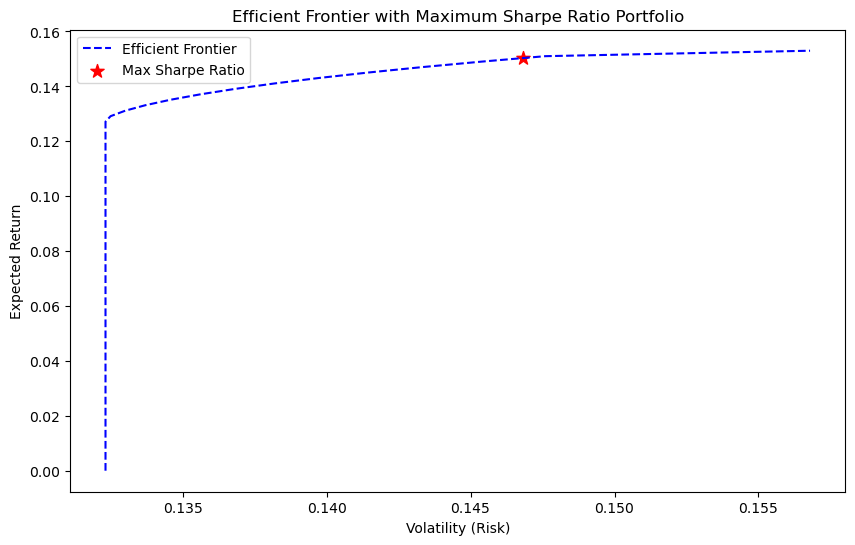

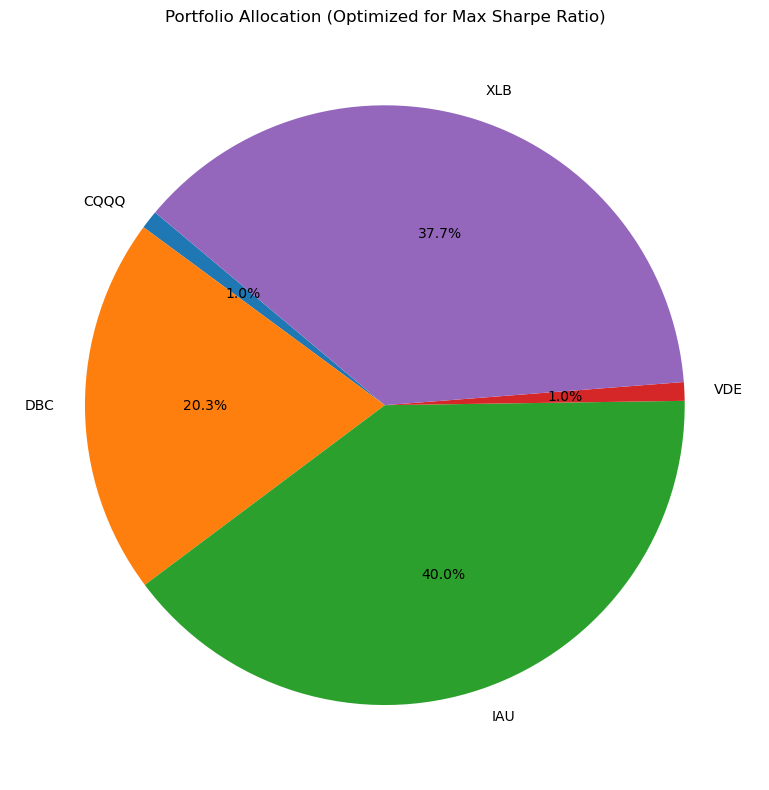

Expected Return: 0.1503298405757221
Volatility: 0.14682043025803754
Sharpe Ratio: 0.8876819142040849
Weights: OrderedDict([('CQQQ', 0.01), ('DBC', 0.20341), ('IAU', 0.4), ('VDE', 0.01), ('XLB', 0.37659)])


In [2]:
import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns
import matplotlib.pyplot as plt
import numpy as np


# Define stock symbols and fetch data
tickers = ['IAU', 'VDE', 'XLB', 'DBC','CQQQ']
data = yf.download(tickers, start="2018-12-01", end="2021-12-31")['Adj Close']

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Initialize the Efficient Frontier object and add constraints before optimization
ef = EfficientFrontier(mu, S)
ef.add_constraint(lambda w: w <= 0.4)  # No asset can have more than 40%
ef.add_constraint(lambda w: w >= 0.01)  # No asset can have less than 1%

# Maximize the Sharpe ratio
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Get performance metrics
expected_return, volatility, sharpe_ratio = ef.portfolio_performance()

# Calculate the maximum possible portfolio return for the range of target returns
max_return = mu.max()  # Upper bound for target returns to avoid ValueError

# Efficient Frontier - Manual Plot
target_returns = np.linspace(0, max_return, 100)  # Use max achievable return as the upper limit
risks = []
for target_return in target_returns:
    ef = EfficientFrontier(mu, S)  # Reinitialize to avoid constraint conflict
    ef.add_constraint(lambda w: w <= 0.4)
    ef.add_constraint(lambda w: w >= 0.01)
    try:
        ef.efficient_return(target_return)
        risks.append(np.sqrt(np.dot(ef.weights.T, np.dot(S, ef.weights))))
    except ValueError:
        # Skip returns that can't be achieved
        continue

# Plot Efficient Frontier
plt.figure(figsize=(10, 6))
plt.plot(risks, target_returns[:len(risks)], 'b--', label="Efficient Frontier")
plt.scatter(volatility, expected_return, marker="*", color="r", s=100, label="Max Sharpe Ratio")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.legend()
plt.title("Efficient Frontier with Maximum Sharpe Ratio Portfolio")

# Display weights pie chart
fig, ax = plt.subplots(figsize=(8, 8))
labels = cleaned_weights.keys()
sizes = cleaned_weights.values()
ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
ax.set_title("Portfolio Allocation (Optimized for Max Sharpe Ratio)")

plt.tight_layout()
plt.show()

# Display calculated portfolio performance and weights
print("Expected Return:", expected_return)
print("Volatility:", volatility)
print("Sharpe Ratio:", sharpe_ratio)
print("Weights:", cleaned_weights)

### b

[*********************100%***********************]  5 of 5 completed


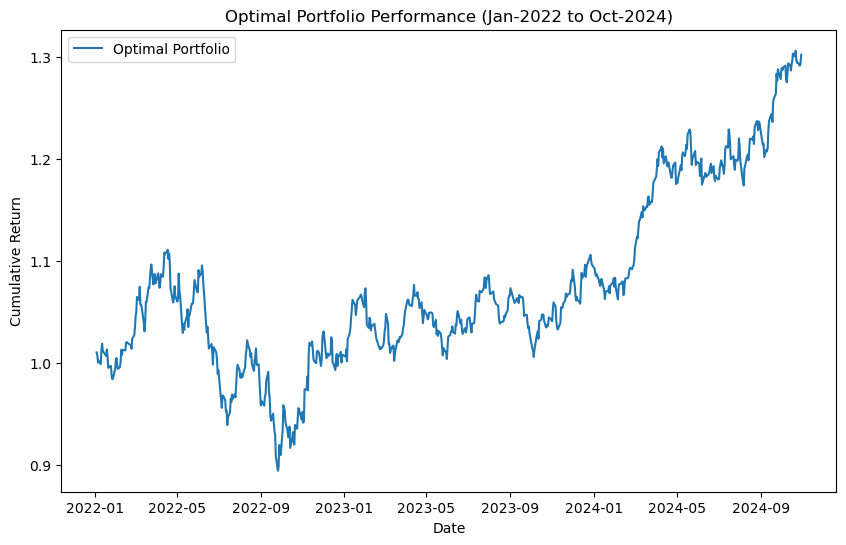

Cumulative Return: 0.30252332781754876
Annualized Return: 0.09789359366200268
Annualized Volatility: 0.12929724974818238


In [3]:
# Fetch historical data from Jan 2022 to Oct 2024
data_2022 = yf.download(tickers, start="2022-01-01", end="2024-10-31")['Adj Close']

# Calculate daily returns
daily_returns_2022 = data_2022.pct_change().dropna()

# Calculate portfolio daily returns using optimal weights
portfolio_returns = daily_returns_2022.dot(list(cleaned_weights.values()))

# Calculate cumulative return
cumulative_returns = (1 + portfolio_returns).cumprod()

# Plotting cumulative return
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label='Optimal Portfolio')
plt.title('Optimal Portfolio Performance (Jan-2022 to Oct-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Add performance metrics lines
cumulative_return = cumulative_returns[-1] - 1
annualized_return = (cumulative_returns[-1]) ** (1 / 2.83) - 1  # 2.83 years for Jan-2022 to Oct-2024
annualized_volatility = portfolio_returns.std() * np.sqrt(252)



plt.legend()
plt.show()

# Performance metrics
print("Cumulative Return:", cumulative_return)
print("Annualized Return:", annualized_return)
print("Annualized Volatility:", annualized_volatility)


### c


[*********************100%***********************]  1 of 1 completed


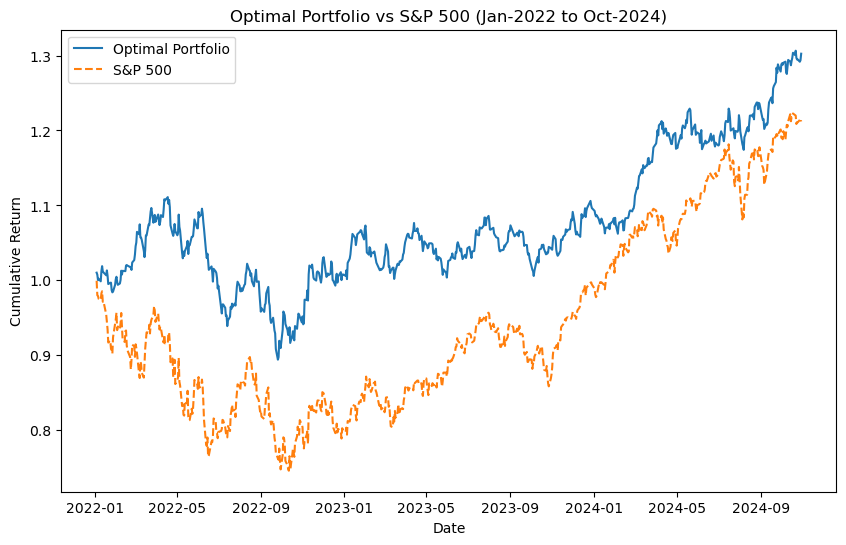

S&P 500 Cumulative Return: 0.21204985465759618
S&P 500 Annualized Return: 0.07031728343996613
S&P 500 Annualized Volatility: 0.17686163394044283


In [4]:
# Fetch S&P 500 historical data
sp500_data = yf.download('^GSPC', start="2022-01-01", end="2024-10-31")['Adj Close']

# Calculate S&P 500 daily returns and cumulative returns
sp500_returns = sp500_data.pct_change().dropna()
sp500_cumulative_returns = (1 + sp500_returns).cumprod()

# Plotting portfolio vs S&P 500
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label='Optimal Portfolio')
plt.plot(sp500_cumulative_returns.index, sp500_cumulative_returns, label='S&P 500', linestyle='--')
plt.title('Optimal Portfolio vs S&P 500 (Jan-2022 to Oct-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Performance metrics for S&P 500
sp500_cumulative_return = sp500_cumulative_returns[-1] - 1
sp500_annualized_return = (sp500_cumulative_returns[-1]) ** (1 / 2.83) - 1
sp500_annualized_volatility = sp500_returns.std() * np.sqrt(252)

print("S&P 500 Cumulative Return:", sp500_cumulative_return)
print("S&P 500 Annualized Return:", sp500_annualized_return)
print("S&P 500 Annualized Volatility:", sp500_annualized_volatility)

### d

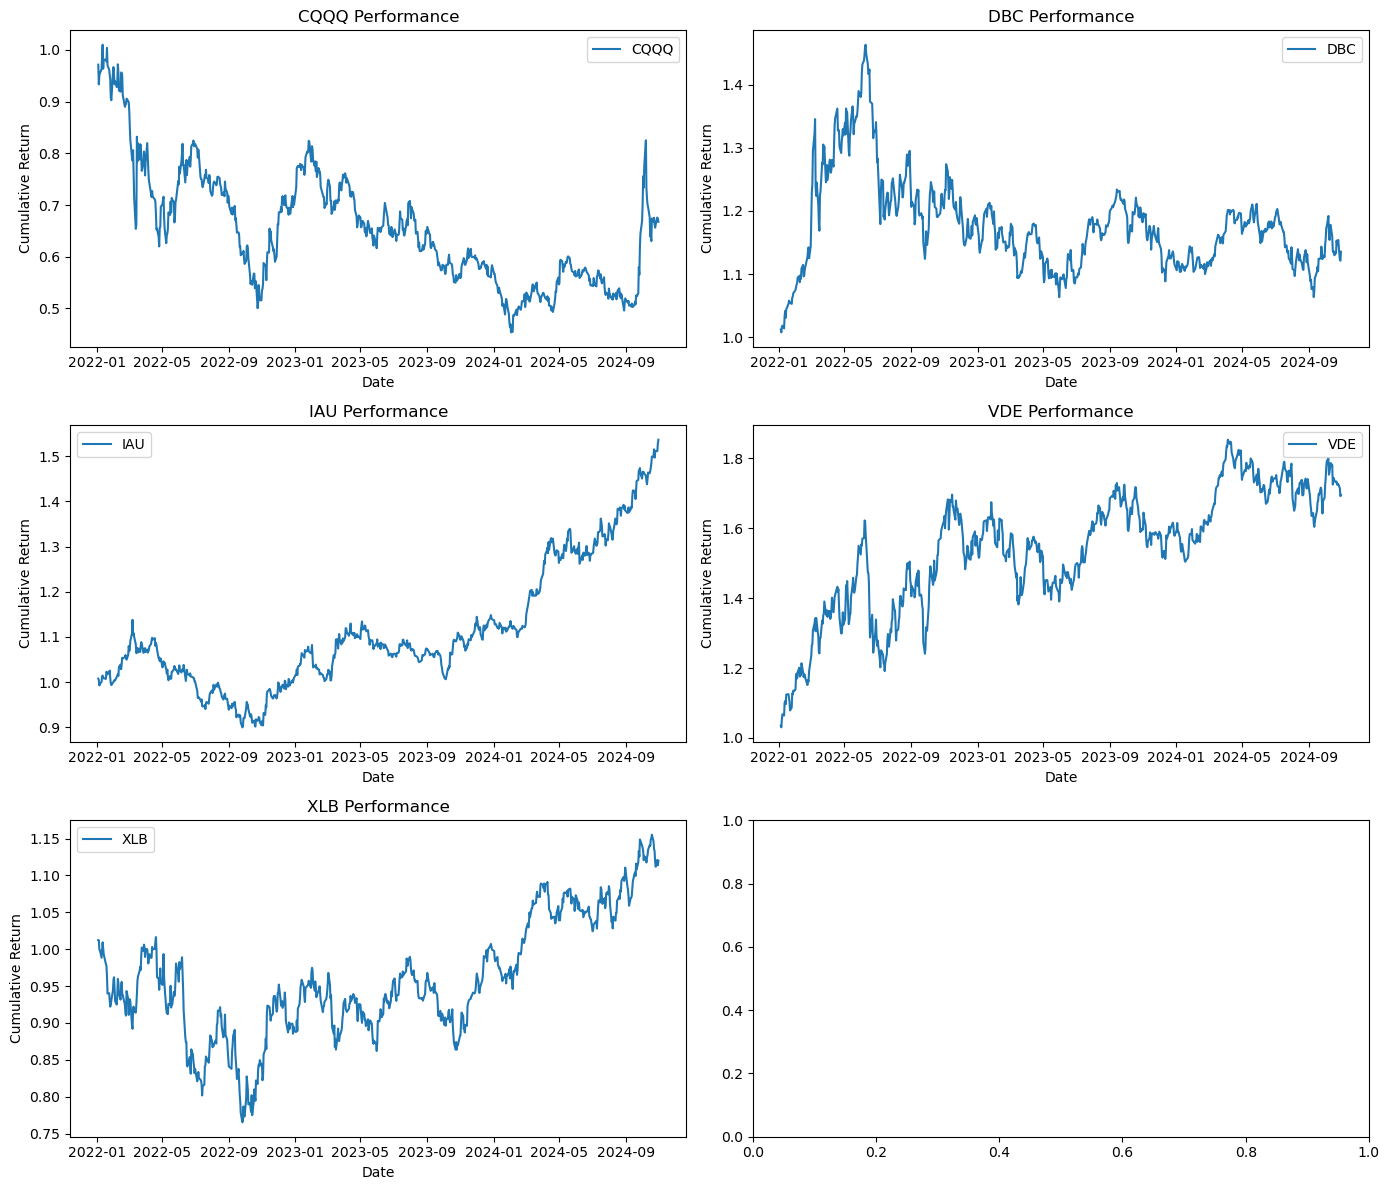

CQQQ Cumulative Return: -0.33247687748758215
CQQQ Annualized Return: -0.13309010008800948
CQQQ Annualized Volatility: 0.4128799620058806

DBC Cumulative Return: 0.13541985746527674
DBC Annualized Return: 0.045899424814299206
DBC Annualized Volatility: 0.19806368865226529

IAU Cumulative Return: 0.5367777030154468
IAU Annualized Return: 0.16396601626672114
IAU Annualized Volatility: 0.1433906990134475

VDE Cumulative Return: 0.6956450602095465
VDE Annualized Return: 0.20513884293895357
VDE Annualized Volatility: 0.27191913333884804

XLB Cumulative Return: 0.1198268963833764
XLB Annualized Return: 0.04080125488544062
XLB Annualized Volatility: 0.1943952984368136



In [5]:
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

etfs = data_2022.columns
for i, etf in enumerate(etfs):
    etf_cumulative_returns = (1 + daily_returns_2022[etf]).cumprod()
    ax[i // 2, i % 2].plot(etf_cumulative_returns, label=etf)
    ax[i // 2, i % 2].set_title(f'{etf} Performance')
    ax[i // 2, i % 2].set_xlabel('Date')
    ax[i // 2, i % 2].set_ylabel('Cumulative Return')
    ax[i // 2, i % 2].legend()

plt.tight_layout()
plt.show()

# Performance statistics for each ETF
for etf in etfs:
    etf_cumulative_return = (1 + daily_returns_2022[etf]).cumprod()[-1] - 1
    etf_annualized_return = ((1 + daily_returns_2022[etf]).cumprod()[-1]) ** (1 / 2.83) - 1
    etf_annualized_volatility = daily_returns_2022[etf].std() * np.sqrt(252)
    print(f"{etf} Cumulative Return: {etf_cumulative_return}")
    print(f"{etf} Annualized Return: {etf_annualized_return}")
    print(f"{etf} Annualized Volatility: {etf_annualized_volatility}\n")

## Part 2: Portfolio Simulation 

### a

In [15]:
# Fetch historical data (Dec-2018 to Dec-2021) for the portfolio components


# Download data from Yahoo Finance
tickers = ['CQQQ', 'DBC', 'IAU', 'VDE', 'XLB']
start_date = '2018-12-01'
end_date = '2021-12-31'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

returns = data.pct_change().dropna()  # Calculate daily returns

# (1) Calculate average return, variance, and covariance
avg_returns = returns.mean() 
cov_matrix = returns.cov() 
mean_returns=returns.mean()

print("Variance-Covariance Matrix:")
print(cov_matrix)




[*********************100%***********************]  5 of 5 completed


Variance-Covariance Matrix:
Ticker      CQQQ       DBC       IAU       VDE       XLB
Ticker                                                  
CQQQ    0.000387  0.000083  0.000015  0.000201  0.000152
DBC     0.000083  0.000137  0.000018  0.000193  0.000095
IAU     0.000015  0.000018  0.000090 -0.000002  0.000017
VDE     0.000201  0.000193 -0.000002  0.000650  0.000313
XLB     0.000152  0.000095  0.000017  0.000313  0.000267


In [13]:
# optimal components: [('CQQQ', 0.01), ('DBC', 0.20341), ('IAU', 0.4), ('VDE', 0.01), ('XLB', 0.37659)]
portfolio_weights = np.array([0.01, 0.20341, 0.4, 0.01, 0.37659])

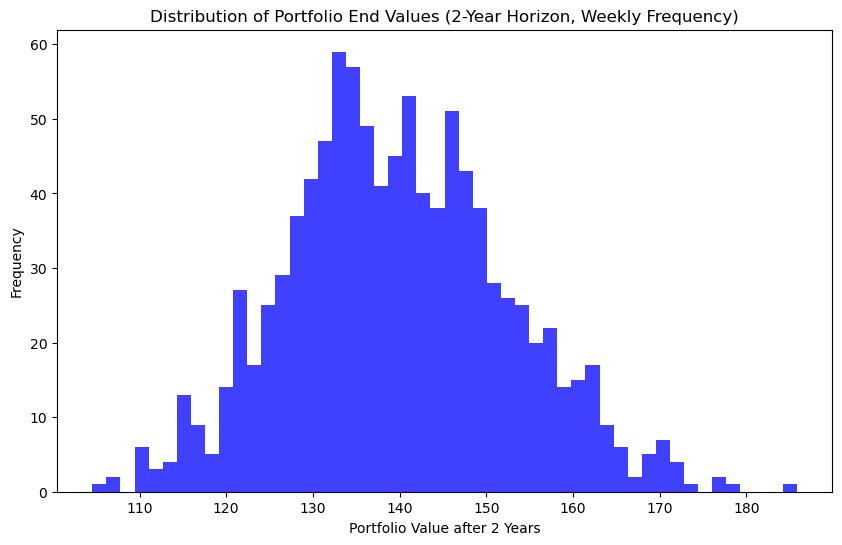

139.83740717280884


In [21]:
# Parameters for the simulation
num_simulations = 1000  # Number of simulation paths
weeks_per_year = 52  # Weekly frequency
num_weeks = weeks_per_year * 2  # Total number of weeks for 2 years
initial_portfolio_value = 100  # Initial portfolio value is set to 100

# Cholesky decomposition of the covariance matrix
cholesky_decomp = np.linalg.cholesky(cov_matrix)

# Run Weekly GBM Simulations

final_values = []  # List to store the final portfolio values from each simulation

for _ in range(num_simulations):
    portfolio_value = initial_portfolio_value  # Start each simulation with the initial value

    for week in range(num_weeks):
        # Generate random vector for correlated returns
        random_vector = np.random.normal(0, 1, len(tickers))
        correlated_returns = np.dot(cholesky_decomp, random_vector)

        # Calculate weekly return using optimal weights, mean weekly returns, and correlated shocks
        weekly_return = np.dot(portfolio_weights, mean_returns * 5 + correlated_returns)

        # Update portfolio value using GBM formula (assuming weekly return)
        portfolio_value *= np.exp(weekly_return)

    # Append the final value after two years
    final_values.append(portfolio_value)

# Plotting the distribution of final values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(final_values, bins=50, alpha=0.75, color='blue')
plt.xlabel("Portfolio Value after 2 Years")
plt.ylabel("Frequency")
plt.title("Distribution of Portfolio End Values (2-Year Horizon, Weekly Frequency)")
plt.show()
# Calculate the mean of the final_values list
mean_final_value = np.mean(final_values)

# Print the mean of the final_values
print(mean_final_value)

### b)


In [17]:
initial_portfolio_value = 100
# Download actual data for the portfolio from Jan 2022 to Jan 2024
price_data_eval = yf.download(tickers, start="2022-01-01", end="2024-01-01")['Adj Close']
daily_returns_eval = price_data_eval.pct_change().dropna()

# Using the optimized weights from the previous solution 
optimal_weights = [0.01, 0.20341, 0.4, 0.01, 0.37659]  
portfolio_daily_returns = daily_returns_eval.dot(optimal_weights)
actual_cumulative_return = (1 + portfolio_daily_returns).cumprod() - 1
actual_end_value = initial_portfolio_value * (1 + actual_cumulative_return.iloc[-1])



[*********************100%***********************]  5 of 5 completed


In [18]:
print(f"Actual Portfolio End Value: {actual_end_value:.2f}")


Actual Portfolio End Value: 109.64


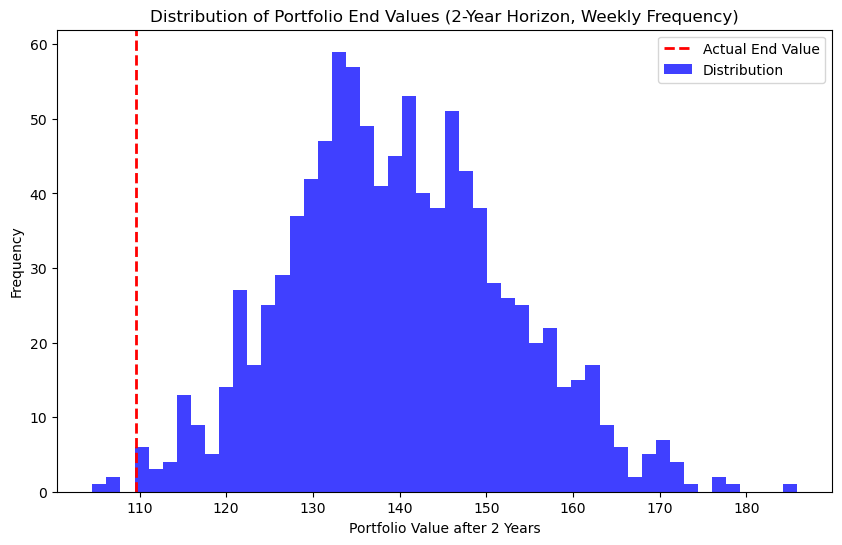

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(final_values, bins=50, alpha=0.75, color='blue')
plt.axvline(actual_end_value, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Portfolio Value after 2 Years")
plt.ylabel("Frequency")
plt.title("Distribution of Portfolio End Values (2-Year Horizon, Weekly Frequency)")
plt.legend(['Actual End Value', 'Distribution'])
plt.show()

In [22]:
P5 = np.percentile(final_values, 5)
P95 = np.percentile(final_values, 95)

print(f"5th Percentile of Simulated Values: {P5:.2f}")
print(f"95th Percentile of Simulated Values: {P95:.2f}")

if actual_end_value < P5:
    print("The actual portfolio end value is in the left tail (lower 5%) of the distribution.")
elif actual_end_value > P95:
    print("The actual portfolio end value is in the right tail (upper 5%) of the distribution.")
else:
    print("The actual portfolio end value is not in the tail regions (not in the top or bottom 5%).")

5th Percentile of Simulated Values: 120.10
95th Percentile of Simulated Values: 162.19
The actual portfolio end value is in the left tail (lower 5%) of the distribution.


- **The actual portfolio end value is in the lower tail (bottom 5%) of the simulated scenarios, indicating that the actual performance was worse than the vast majority of the simulations.**
- **This outcome represents a tail event in the lower end of the distribution, suggesting an unusually poor performance compared to the predictions of the simulation.**

## Part 3: Logit Regression for Credit Default 

### 3.1

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Load data
data = pd.read_csv('credit_card_default.csv')

# Exploratory Data Analysis (EDA)

print(data.head())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_next_month  
0         0         0         0 

In [65]:
# Drop the ID column as it's not useful for modeling
data.drop(columns=['ID'], inplace=True)

# Exploratory Data Analysis (EDA)
# Summary statistics
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


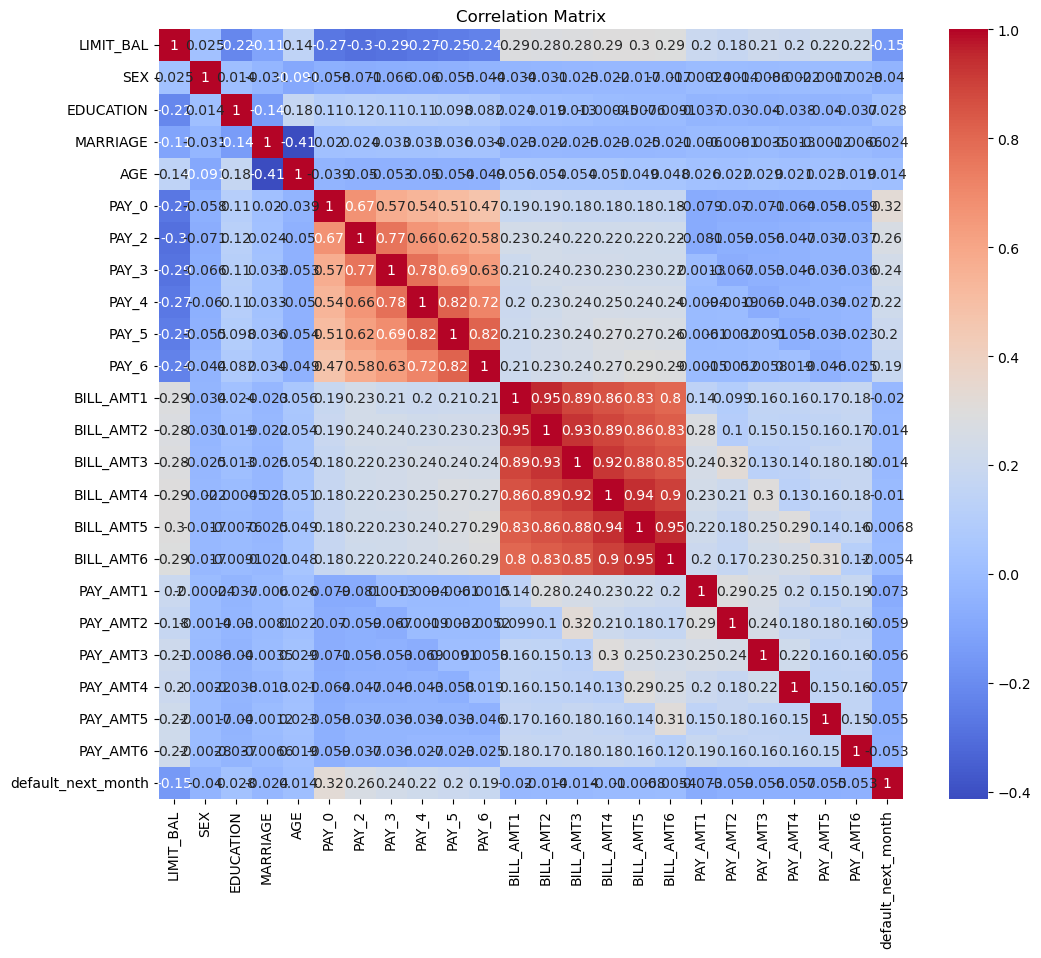

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [67]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values

LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_0                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
default_next_month    0
dtype: int64

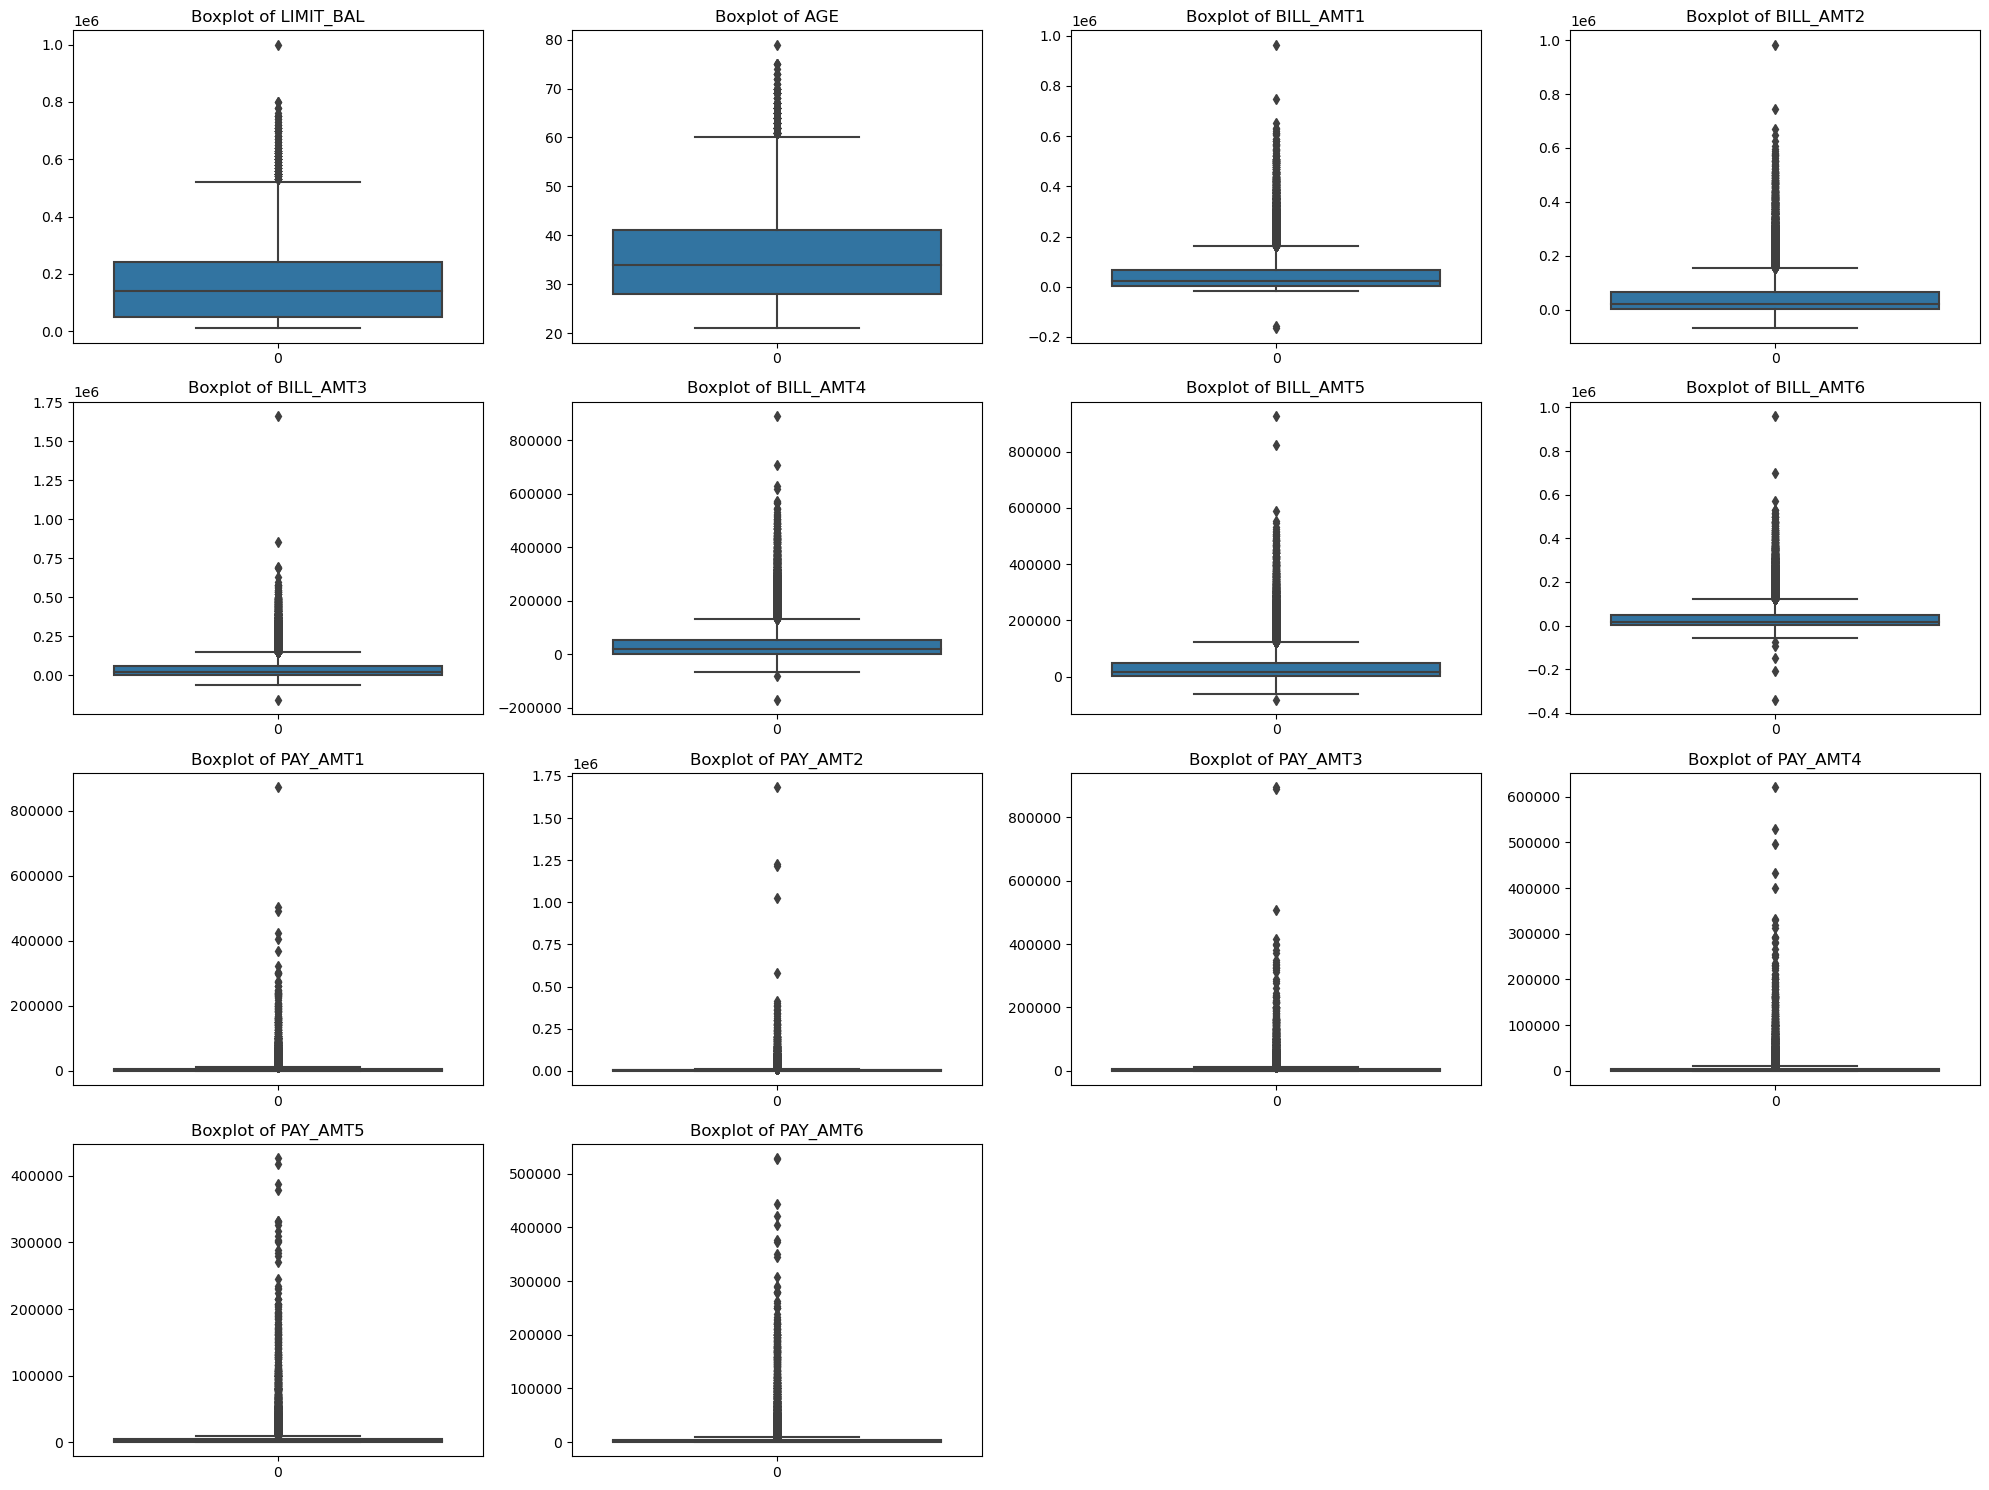

In [68]:
# Checking for outliers using boxplots for numerical features
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                      'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
                      'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [69]:
# Capping outliers in numerical features
for feature in numerical_features:
    upper_limit = data[feature].quantile(0.95)
    lower_limit = data[feature].quantile(0.05)
    data[feature] = np.clip(data[feature], lower_limit, upper_limit)

# Splitting the data into the first train-test split
train_data_1 = data.iloc[:20000]
test_data_1 = data.iloc[20000:30000]

# Defining features and target variable
X_train_1 = train_data_1.drop(columns=['default_next_month'])
y_train_1 = train_data_1['default_next_month']
X_test_1 = test_data_1.drop(columns=['default_next_month'])
y_test_1 = test_data_1['default_next_month']

# Identifying categorical and numerical features
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_features = [col for col in X_train_1.columns if col not in categorical_features]

# Preprocessing pipeline: scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Logistic Regression pipeline
logit_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(max_iter=1000))])

# Train the model
logit_pipeline.fit(X_train_1, y_train_1)

# Make predictions and evaluate accuracy
y_pred_1 = logit_pipeline.predict(X_test_1)
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
classification_rep_1 = classification_report(y_test_1, y_pred_1)

# Display results
accuracy_1, classification_rep_1


(0.8202,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.98      0.90      7922\n           1       0.72      0.22      0.34      2078\n\n    accuracy                           0.82     10000\n   macro avg       0.77      0.60      0.62     10000\nweighted avg       0.81      0.82      0.78     10000\n')

- Precision (0 class): 0.83
- Precision (1 class): 0.72
- Recall (0 class): 0.98
- Recall (1 class): 0.22
- F1-score (0 class): 0.90
- F1-score (1 class): 0.34

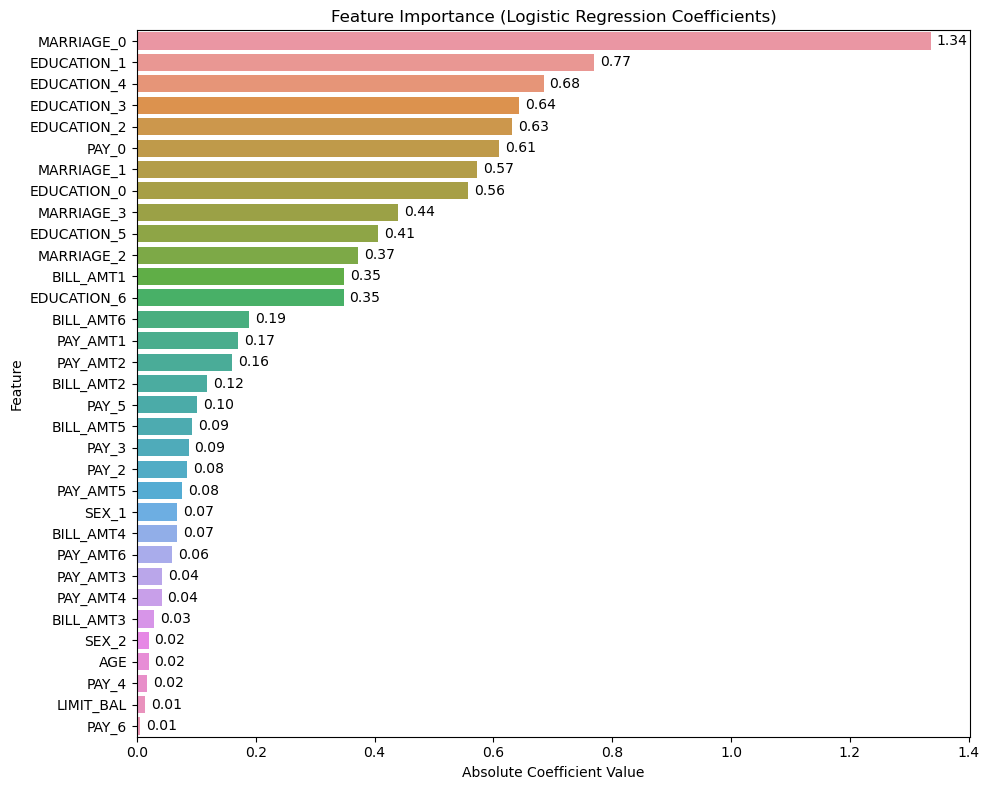

In [71]:
# Extract feature names after encoding and scaling
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(encoded_feature_names)

# Extract feature coefficients from logistic regression model
coefficients = logit_pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plot feature importance
# Plot feature importance with values on each bar
plt.figure(figsize=(10, 8))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')

# Annotate each bar with the coefficient value
for index, value in enumerate(feature_importance['Abs_Coefficient']):
    plt.text(value + 0.01, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

### 3.2

In [72]:
# Splitting the data into the second train-test split
train_data_2 = data.iloc[10000:30000]
test_data_2 = data.iloc[:10000]

# Defining features and target variable for the second split
X_train_2 = train_data_2.drop(columns=['default_next_month'])
y_train_2 = train_data_2['default_next_month']
X_test_2 = test_data_2.drop(columns=['default_next_month'])
y_test_2 = test_data_2['default_next_month']

# Train the model using the second train-test split
logit_pipeline.fit(X_train_2, y_train_2)

# Make predictions and evaluate accuracy for the second split
y_pred_2 = logit_pipeline.predict(X_test_2)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
classification_rep_2 = classification_report(y_test_2, y_pred_2)

# Display results for the second split
accuracy_2, classification_rep_2

(0.8008,
 '              precision    recall  f1-score   support\n\n           0       0.81      0.96      0.88      7741\n           1       0.66      0.24      0.35      2259\n\n    accuracy                           0.80     10000\n   macro avg       0.74      0.60      0.62     10000\nweighted avg       0.78      0.80      0.76     10000\n')

- Precision (0 class): 0.81
- Precision (1 class): 0.66
- Recall (0 class): 0.96
- Recall (1 class): 0.24
- F1-score (0 class): 0.88
- F1-score (1 class): 0.35

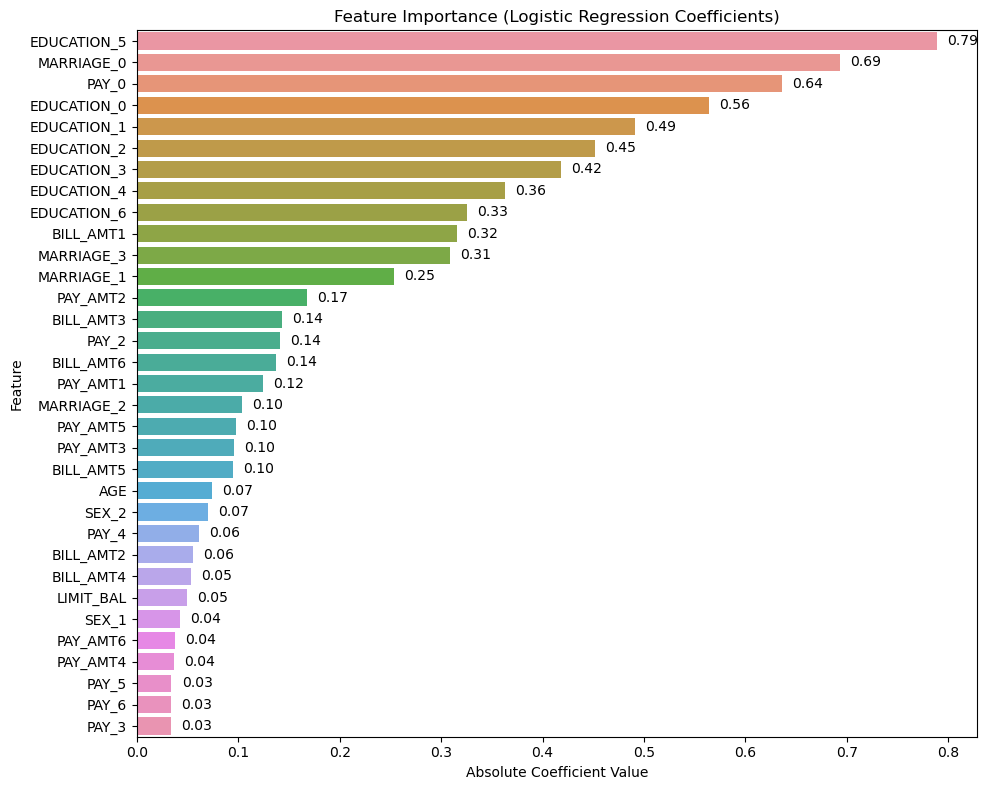

In [73]:
# Extract feature names after encoding and scaling
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(encoded_feature_names)

# Extract feature coefficients from logistic regression model
coefficients = logit_pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plot feature importance
# Plot feature importance with values on each bar
plt.figure(figsize=(10, 8))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')

# Annotate each bar with the coefficient value
for index, value in enumerate(feature_importance['Abs_Coefficient']):
    plt.text(value + 0.01, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

### Comparison of Train-Test Splits

#### Classification Report Comparison

| Metric                | First Split (Train: First 20,000, Test: Last 10,000) | Second Split (Train: Last 20,000, Test: First 10,000) |
|-----------------------|------------------------------------------------------|-------------------------------------------------------|
| **Precision (0 class)** | 0.83                                                 | 0.81                                                  |
| **Precision (1 class)** | 0.72                                                 | 0.66                                                  |
| **Recall (0 class)**    | 0.98                                                 | 0.96                                                  |
| **Recall (1 class)**    | 0.22                                                 | 0.24                                                  |
| **F1-score (0 class)**  | 0.90                                                 | 0.88                                                  |
| **F1-score (1 class)**  | 0.34                                                 | 0.35                                                  |

**Key Observations**:
- Precision for **class 1** decreased in the second split, indicating an increase in false positives.
- Recall for **class 1** improved slightly, showing better identification of defaults.
- **F1-score** for **class 1** increased slightly in the second split.
- Performance for **class 0** decreased slightly in the second split, but remains high.

#### Feature Importance Comparison

| Rank | First Split Feature Importance          | Absolute Coefficient | Second Split Feature Importance         | Absolute Coefficient |
|------|-----------------------------------------|----------------------|-----------------------------------------|----------------------|
| 1    | **MARRIAGE_0**                          | 1.34                 | **EDUCATION_5**                         | 0.79                 |
| 2    | **EDUCATION_1**                         | 0.77                 | **MARRIAGE_0**                          | 0.69                 |
| 3    | **EDUCATION_4**                         | 0.68                 | **PAY_0**                               | 0.64                 |
| 4    | **EDUCATION_3**                         | 0.64                 | **EDUCATION_0**                         | 0.56                 |
| 5    | **EDUCATION_2**                         | 0.63                 | **EDUCATION_1**                         | 0.49                 |
| ...  | ...                                     | ...                  | ...                                     | ...                  |

**Key Observations**:
- In the **first split**, **MARRIAGE_0** was the most important feature with a coefficient of **1.34**.
- In the **second split**, **EDUCATION_5** was the most important feature, with **MARRIAGE_0** dropping in importance.
- There is variability in the order and value of feature importance between the splits, suggesting different data distributions led to different relationships between features and the target variable.

### Summary
- The model's **performance on class 1 (defaults)** improved slightly in the second split, but at the cost of lower precision.
- **Feature importance** varied between the two splits, highlighting the sensitivity of the model to different data distributions.



